# Neural Networks with PyTorch

_Thirada Tiamklang 14337188_

In this assignment, we are going to train a Neural Networks on the Japanese MNIST dataset. It is composed of 70000 images of handwritten Hiragana characters. The target variables has 10 different classes.

Each image is of dimension 28 by 28. But we will flatten them to form a dataset composed of vectors of dimension (784, 1). The training process will be similar as for a structured dataset.

<img src='https://drive.google.com/uc?id=16TqEl9ESfXYbUpVafXD6h5UpJYGKfMxE' width="500" height="200">

Your goal is to run at least 3 experiments and get a model that can achieve 80% accuracy with not much overfitting on this dataset.

Some of the code have already been defined for you. You need only to add your code in the sections specified (marked with **TODO**). Some assert statements have been added to verify the expected outputs are correct. If it does throw an error, this means your implementation is behaving as expected.

Note: You can only use fully-connected and dropout layers for this assignment. You can not convolution layers for instance

# 1. Import Required Packages

[1.1] We are going to use numpy, matplotlib and google.colab packages

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

# 2. Download Dataset

We will store the dataset into your personal Google Drive.


[2.1] Mount Google Drive

In [ ]:
drive.mount('/content/gdrive')

[2.2] Create a folder called `DL_ASG_1` on your Google Drive at the root level

In [ ]:
! mkdir -p /content/gdrive/MyDrive/DL_ASG_1

[2.3] Navigate to this folder

In [ ]:
%cd '/content/gdrive/MyDrive/DL_ASG_1'

[2.4] Show the list of item on the folder

In [ ]:
!ls

[2.4] Dowload the dataset files to your Google Drive if required

In [ ]:
import requests
from tqdm import tqdm
import os.path

def download_file(url):
    path = url.split('/')[-1]
    if os.path.isfile(path):
        print (f"{path} already exists")
    else:
      r = requests.get(url, stream=True)
      with open(path, 'wb') as f:
          total_length = int(r.headers.get('content-length'))
          print('Downloading {} - {:.1f} MB'.format(path, (total_length / 1024000)))
          for chunk in tqdm(r.iter_content(chunk_size=1024), total=int(total_length / 1024) + 1, unit="KB"):
              if chunk:
                  f.write(chunk)

url_list = [
    'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz',
    'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz',
    'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz',
    'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz'
]

for url in url_list:
    download_file(url)

[2.5] List the content of the folder and confirm files have been dowloaded properly

In [ ]:
! ls

# 3. Load Data

[3.1] Import the required modules from PyTorch

In [6]:
# TODO (Students need to fill this section)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

[3.2] **TODO** Create 2 variables called `img_height` and `img_width` that will both take the value 28

In [7]:
# TODO (Students need to fill this section)
img_height = 28
img_width = 28

[3.3] Create a function that loads a .npz file using numpy and return the content of the `arr_0` key

In [ ]:
def load(f):
    return np.load(f)['arr_0']

[3.4] **TODO** Load the 4 files saved on your Google Drive into their respective variables: x_train, y_train, x_test and y_test

In [ ]:
# TODO (Students need to fill this section)
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

[3.5] **TODO** Using matplotlib display the first image from the train set and its target value

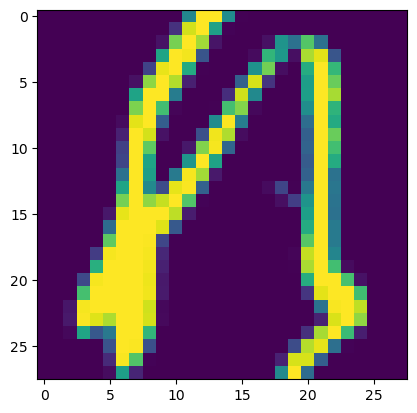

In [8]:
# TODO (Students need to fill this section)
plt.imshow(x_train[0].reshape(img_height, img_width))
plt.show()

# 4. Prepare Data

[4.1] **TODO** Reshape the images from the training and testing set to have the channel dimension last. The dimensions should be: (row_number, height, width, channel)

In [9]:
# TODO (Students need to fill this section)
x_train = x_train.reshape(x_train.shape[0], img_height, img_width, 1)
x_test = x_test.reshape(x_test.shape[0], img_height, img_width, 1)

[4.2] **TODO** Cast `x_train` and `x_test` into `float32` decimals

In [10]:
# TODO (Students need to fill this section)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

[4.3] **TODO** Standardise the images of the training and testing sets. Originally each image contains pixels with value ranging from 0 to 255. after standardisation, the new value range should be from 0 to 1.

In [11]:
# TODO (Students need to fill this section)
x_train /= 255
x_test /= 255

[4.4] **TODO** Create a variable called `num_classes` that will take the value 10 which corresponds to the number of classes for the target variable

In [12]:
# TODO (Students need to fill this section)
num_classes = 10

[4.5] **TODO** Convert the target variable for the training and testing sets to a binary class matrix of dimension (rows, num_classes).

For example:
- class 0 will become [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
- class 1 will become [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
- class 5 will become [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
- class 9 will become [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [13]:
# TODO (Students need to fill this section)
# Convert target variables to one-hot encoded tensors
y_train = torch.eye(num_classes)[torch.tensor(y_train, dtype=torch.long)]
y_test = torch.eye(num_classes)[torch.tensor(y_test, dtype=torch.long)]

# 5. Define Neural Networks Architecure

[5.1] Set the seed in PyTorch for reproducing results



In [14]:
# TODO (Students need to fill this section)
torch.manual_seed(42)

[5.2] **TODO** Define the architecture of your Neural Networks and save it into a variable called `model`

----------------------------------------------
__Experiment 1__ :

_1 hidden layers and dropout rate = 0.5_

In [27]:
# TODO (Students need to fill this section)
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, num_classes, dropout_rate=0.5):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size1, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        return x

# Define the input size, hidden size, and number of classes
input_size = 784  # 28x28
hidden_size1 = 128
num_classes = 10
dropout_rate = 0.5

# Create an instance of the model
model1 = NeuralNetwork(input_size, hidden_size1, num_classes, dropout_rate)

[5.2] **TODO** Print the summary of your model

In [16]:
# TODO (Students need to fill this section)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model1.to(device)
print(model1)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


--------
__Experiment 2__:

_1 hidden layers and dropout rate = 0.1_

In [46]:
# TODO (Students need to fill this section)
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, num_classes, dropout_rate2=0.1):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.dropout = nn.Dropout(dropout_rate2)
        self.fc2 = nn.Linear(hidden_size1, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        return x

# Define the input size, hidden size, and number of classes
input_size = 784  # 28x28
hidden_size1 = 128
num_classes = 10
dropout_rate2 = 0.1

# Create an instance of the model
model2 = NeuralNetwork(input_size, hidden_size1, num_classes, dropout_rate2)

In [93]:
# TODO (Students need to fill this section)
model2.to(device)
print(model2)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


------
__Experiment 3__:

_2 hidden layers and dropout rate = 0.1_

In [48]:
# TODO (Students need to fill this section)
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes, dropout_rate3=0.1):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  # New hidden layer
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.dropout = nn.Dropout(dropout_rate3)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = F.relu(self.fc2(x))  # New hidden layer with ReLU activation
        x = self.dropout(x)  # Apply dropout
        x = self.fc3(x)
        return x

# Define the input size, hidden sizes, and number of classes
input_size = 784  # 28x28
hidden_size1 = 256
hidden_size2 = 128  # Size of the new hidden layer
num_classes = 10
dropout_rate3 = 0.1

# Create an instance of the model
model3 = NeuralNetwork(input_size, hidden_size1, hidden_size2, num_classes, dropout_rate3)

In [49]:
model3.to(device)
print(model3)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


---
__Experiment 4__:

_3 hidden layers and dropout rate = 0.1_

In [30]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes, dropout_rate4=0.1):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  # New hidden layer 1
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)  # New hidden layer 2
        self.fc4 = nn.Linear(hidden_size3, num_classes)
        self.dropout = nn.Dropout(dropout_rate4)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = F.relu(self.fc2(x))  # New hidden layer 1 with ReLU activation
        x = self.dropout(x)  # Apply dropout
        x = F.relu(self.fc3(x))  # New hidden layer 2 with ReLU activation
        x = self.dropout(x)  # Apply dropout
        x = self.fc4(x)
        return x

# Define the input size, hidden sizes, and number of classes
input_size = 784  # 28x28
hidden_size1 = 512
hidden_size2 = 256  # Size of the new hidden layer 1
hidden_size3 = 128  # Size of the new hidden layer 2
num_classes = 10
dropout_rate4 = 0.1

# Create an instance of the model
model4 = NeuralNetwork(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes, dropout_rate4)


In [22]:
model4.to(device)
print(model4)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


# 6. Train Neural Networks

[6.1] **TODO** Create 2 variables called `batch_size` and `epochs` that will  respectively take the values 128 and 500

In [23]:
# TODO (Students need to fill this section)
batch_size = 128
epochs = 500

[6.2] **TODO** Compile your model with the appropriate loss function, the optimiser of your choice and the accuracy metric

In [94]:
# TODO (Students need to fill this section)
weight_decay = 0.001

criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.0001, weight_decay=weight_decay)
optimizer2 = optim.Adam(model2.parameters(), lr=0.0001, weight_decay=weight_decay)
optimizer3 = optim.SGD(model3.parameters(), lr=0.001, momentum=0.9, weight_decay=weight_decay)
optimizer4 = optim.SGD(model4.parameters(), lr=0.001, momentum=0.9, weight_decay=weight_decay)

[6.3] **TODO** Train your model
using the number of epochs defined. Calculate the total loss and save it to a variable called total_loss.

In [25]:
# TODO (Students need to fill this section)
from torch.utils.data import TensorDataset, DataLoader

# Convert training and testing data to tensors
x_train_tensor = torch.tensor(x_train)
x_test_tensor = torch.tensor(x_test)

# Create TensorDataset objects
train_dataset = TensorDataset(x_train_tensor, y_train)
test_dataset = TensorDataset(x_test_tensor, y_test)

# Create DataLoader objects
dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

---
__Experiment 1__:

_using Adam optimizer, lr=0.0001, and weight_decay = 0.001_

In [32]:
# Train model1
total_loss_list1 = []
for epoch in range(epochs):
    total_loss1 = 0
    for data, target in dataloader_train:
        data = data.to(device)  # Move data to the same device as the model
        target = target.to(device)  # Move target to the same device as the model
        optimizer1.zero_grad() #Zero gradients
        outputs = model1(data) # Forward Propagation to get predicted outcome
        loss = criterion(outputs, target) # Compute the loss
        loss.backward()  # Back propagation
        optimizer1.step()  # Update the weights
        total_loss1 += loss.item()

    total_loss1 /= len(dataloader_train)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
        total_loss_list1.append(total_loss1)

Epoch [100/500], Loss: 0.2272
Epoch [200/500], Loss: 0.2413
Epoch [300/500], Loss: 0.3179
Epoch [400/500], Loss: 0.1890
Epoch [500/500], Loss: 0.2779


In [33]:
# Calculate average training accuracy
correct_train1 = 0
total_train1 = 0
with torch.no_grad():
    for data, target in dataloader_train:
        data = data.to(device)
        target = target.to(device)
        outputs1 = model1(data)
        _, predicted_train = torch.max(outputs1, 1)
        _, target_labels_train = torch.max(target, 1)
        correct_train1 += (predicted_train == target_labels_train).sum().item()
        total_train1 += target.size(0)
train_accuracy1 = correct_train1 / total_train1
print(f'Experiment1 Training Accuracy: {train_accuracy1:.4f}')

Experiment1 Training Accuracy: 0.9309


[6.4] **TODO** Test your model.  Initiate the model.eval() along with torch.no_grad() to turn off the gradients.


In [34]:
# TODO (Students need to fill this section)
# Set the model to evaluation mode
model1.eval()

# Initialize variables for accuracy calculation
correct1 = 0
total1 = 0

# Turn off gradient computation for testing
with torch.no_grad():
    for i, (data, target) in enumerate(dataloader_test):
        data = data.to(device)  # Move data to the same device as the model
        target = target.to(device)  # Move target to the same device as the model

        # Forward pass
        outputs1 = model1(data)

        # Calculate accuracy
        _, predicted = torch.max(outputs1, 1)
        _, target_labels = torch.max(target, 1)  # Convert one-hot encoded labels to class indices

        correct1 += (predicted == target_labels).sum().item()
        total1 += target.size(0)

# Calculate accuracy
accuracy1 = correct1 / total1
print(f'Experiment1 Test Accuracy: {accuracy1:.4f}')

Experiment1 Test Accuracy: 0.8662


---
__Experiment2__:

_using Adam optimizer, lr=0.0001, and weight_decay = 0.001_

In [95]:
# Train model2
total_loss_list2 = []
for epoch in range(epochs):
    total_loss2 = 0
    for data, target in dataloader_train:
        data = data.to(device)  # Move data to the same device as the model
        target = target.to(device)  # Move target to the same device as the model
        optimizer2.zero_grad() #Zero gradients
        outputs2 = model2(data) # Forward Propagation to get predicted outcome
        loss2 = criterion(outputs2, target) # Compute the loss
        loss2.backward()  # Back propagation
        optimizer2.step()  # Update weight
        total_loss2 += loss2.item()

    total_loss2 /= len(dataloader_train)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss2.item():.4f}')
        total_loss_list2.append(total_loss2)

Epoch [100/500], Loss: 0.0513
Epoch [200/500], Loss: 0.0512
Epoch [300/500], Loss: 0.1141
Epoch [400/500], Loss: 0.0625
Epoch [500/500], Loss: 0.0673


In [96]:
# Calculate ex2 training accuracy
correct_train2 = 0
total_train2 = 0
with torch.no_grad():
    for data, target in dataloader_train:
        data = data.to(device)
        target = target.to(device)
        outputs2 = model2(data)
        _, predicted_train2 = torch.max(outputs2, 1)
        _, target_labels_train2 = torch.max(target, 1)
        correct_train2 += (predicted_train2 == target_labels_train2).sum().item()
        total_train2 += target.size(0)
train_accuracy2 = correct_train2 / total_train2
print(f'Experiment2 Training Accuracy: {train_accuracy2:.4f}')

Experiment2 Training Accuracy: 0.9904


In [97]:
# Set the model to evaluation mode
model2.eval()
correct2 = 0
total2 = 0
# Turn off gradient computation for testing
with torch.no_grad():
    for i, (data, target) in enumerate(dataloader_test):
        data = data.to(device)  # Move data to the same device as the model
        target = target.to(device)  # Move target to the same device as the model
        outputs2 = model2(data)
        # Calculate accuracy
        _, predicted2 = torch.max(outputs2, 1)
        _, target_labels2 = torch.max(target, 1)  # Convert one-hot encoded labels to class indices

        correct2 += (predicted2 == target_labels2).sum().item()
        total2 += target.size(0)

# Calculate accuracy
accuracy2 = correct2 / total2
print(f'Experiment2 Test Accuracy: {accuracy2:.4f}')

Experiment2 Test Accuracy: 0.9044


---
__Experiment 3__:

_using SGD optimizer with momentum = 0.9, lr=0.001, weight_decay = 0.001, and early stopping_

In [58]:
# Define early stopping parameters
patience = 10
best_loss = float('inf')
early_stopping_counter = 0

# Train model3
total_loss_list3 = []
for epoch in range(epochs):
    total_loss3 = 0
    for data, target in dataloader_train:
        data = data.to(device)  # Move data to the same device as the model
        target = target.to(device)  # Move target to the same device as the model
        optimizer3.zero_grad() #Zero gradients
        outputs3 = model3(data) # Forward Propagation to get predicted outcome
        loss3 = criterion(outputs3, target) # Compute the loss
        loss3.backward()  # Back propagation
        optimizer3.step()  # Update weight
        total_loss3 += loss3.item()

    total_loss3 /= len(dataloader_train)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss3.item():.4f}')
        total_loss_list3.append(total_loss3)

Epoch [100/500], Loss: 0.1124
Epoch [200/500], Loss: 0.0661
Epoch [300/500], Loss: 0.0351
Epoch [400/500], Loss: 0.0320
Epoch [500/500], Loss: 0.0317


In [59]:
# Calculate ex3 training accuracy
correct_train3 = 0
total_train3 = 0
with torch.no_grad():
    for data, target in dataloader_train:
        data = data.to(device)
        target = target.to(device)
        outputs3 = model3(data)
        _, predicted_train3 = torch.max(outputs3, 1)
        _, target_labels_train3 = torch.max(target, 1)
        correct_train3 += (predicted_train3 == target_labels_train3).sum().item()
        total_train3 += target.size(0)
train_accuracy3 = correct_train3 / total_train3
print(f'Experiment3 Training Accuracy: {train_accuracy3:.4f}')

Experiment3 Training Accuracy: 0.9935


In [60]:
# Set the model to evaluation mode
model3.eval()
correct3 = 0
total3 = 0
# Turn off gradient computation for testing
with torch.no_grad():
    for i, (data, target) in enumerate(dataloader_test):
        data = data.to(device)  # Move data to the same device as the model
        target = target.to(device)  # Move target to the same device as the model
        outputs3 = model3(data)
        # Calculate accuracy
        _, predicted3 = torch.max(outputs3, 1)
        _, target_labels3 = torch.max(target, 1)  # Convert one-hot encoded labels to class indices

        correct3 += (predicted3 == target_labels3).sum().item()
        total3 += target.size(0)

# Calculate accuracy
accuracy3 = correct3 / total3
print(f'Experiment3 Test Accuracy: {accuracy3:.4f}')

Experiment3 Test Accuracy: 0.9067


---
__Experiment 4__:

_using SGD optimizer with momentum = 0.9, lr=0.001, weight_decay = 0.001, and early stopping_

In [64]:
# Define early stopping parameters
patience = 10
best_loss = float('inf')
early_stopping_counter = 0

# Train model4
total_loss_list4 = []
for epoch in range(epochs):
    total_loss4 = 0
    for data, target in dataloader_train:
        data = data.to(device)  # Move data to the same device as the model
        target = target.to(device)  # Move target to the same device as the model
        optimizer4.zero_grad() #Zero gradients
        outputs4 = model4(data) # Forward Propagation to get predicted outcome
        loss4 = criterion(outputs4, target) # Compute the loss
        loss4.backward()  # Back propagation
        optimizer4.step()  # Update weight
        total_loss4 += loss4.item()

    total_loss4 /= len(dataloader_train)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss4.item():.4f}')
        total_loss_list4.append(total_loss4)

Epoch [100/500], Loss: 0.0714
Epoch [200/500], Loss: 0.0379
Epoch [300/500], Loss: 0.0286
Epoch [400/500], Loss: 0.0077
Epoch [500/500], Loss: 0.0329


In [65]:
# Calculate ex4 training accuracy
correct_train4 = 0
total_train4 = 0
with torch.no_grad():
    for data, target in dataloader_train:
        data = data.to(device)
        target = target.to(device)
        outputs4 = model4(data)
        _, predicted_train4 = torch.max(outputs4, 1)
        _, target_labels_train4 = torch.max(target, 1)
        correct_train4 += (predicted_train4 == target_labels_train4).sum().item()
        total_train4 += target.size(0)
train_accuracy4 = correct_train4 / total_train4
print(f'Experiment4 Training Accuracy: {train_accuracy4:.4f}')

Experiment4 Training Accuracy: 0.9989


In [66]:
# Set the model to evaluation mode
model4.eval()
correct4 = 0
total4 = 0
# Turn off gradient computation for testing
with torch.no_grad():
    for i, (data, target) in enumerate(dataloader_test):
        data = data.to(device)  # Move data to the same device as the model
        target = target.to(device)  # Move target to the same device as the model
        outputs4 = model4(data)
        # Calculate accuracy
        _, predicted4 = torch.max(outputs4, 1)
        _, target_labels4 = torch.max(target, 1)  # Convert one-hot encoded labels to class indices

        correct4 += (predicted4 == target_labels4).sum().item()
        total4 += target.size(0)

# Calculate accuracy
accuracy4 = correct4 / total4
print(f'Experiment4 Test Accuracy: {accuracy4:.4f}')

Experiment4 Test Accuracy: 0.9058


# 7. Analyse Results

__Experiment 1__

[7.1] **TODO** Display the performance of your model on the training and testing sets

In [35]:
# TODO (Students need to fill this section)
print(f'Experiment1 Training Accuracy: {train_accuracy1:.4f}')
print(f'Experiment1 Test Accuracy: {accuracy1:.4f}')

Experiment1 Training Accuracy: 0.9309
Experiment1 Test Accuracy: 0.8662


[7.2] **TODO** Plot the learning curve of your model

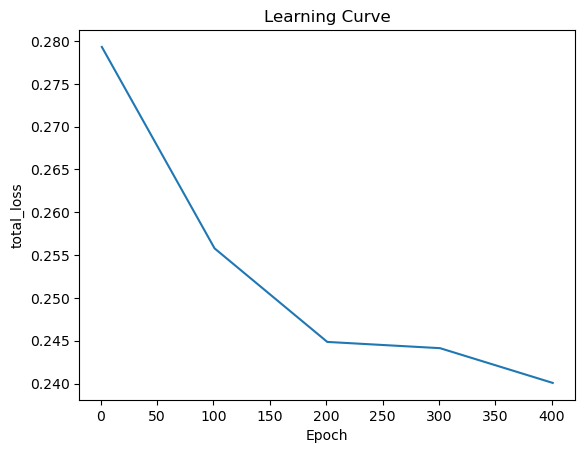

In [40]:
# TODO (Students need to fill this section)
# Plotting the learning curve
plt.plot(range(1, epochs + 1, 100), total_loss_list1)
plt.ylabel("total_loss")
plt.xlabel('Epoch')
plt.title('Learning Curve')
plt.show()

[7.3] **TODO** Display the confusion matrix on the testing set predictions

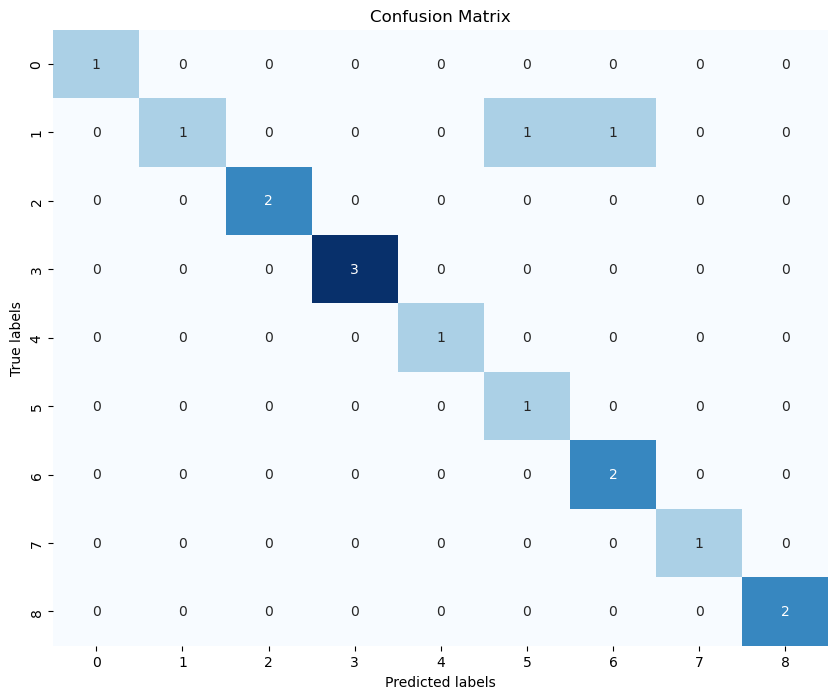

In [42]:
# TODO (Students need to fill this section)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(target_labels, predicted)
# Import the packages for plotting the graph
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

---
__Experiment 2__

In [98]:
# TODO (Students need to fill this section)
print(f'Experiment2 Training Accuracy: {train_accuracy2:.4f}')
print(f'Experiment2 Test Accuracy: {accuracy2:.4f}')

Experiment2 Training Accuracy: 0.9904
Experiment2 Test Accuracy: 0.9044


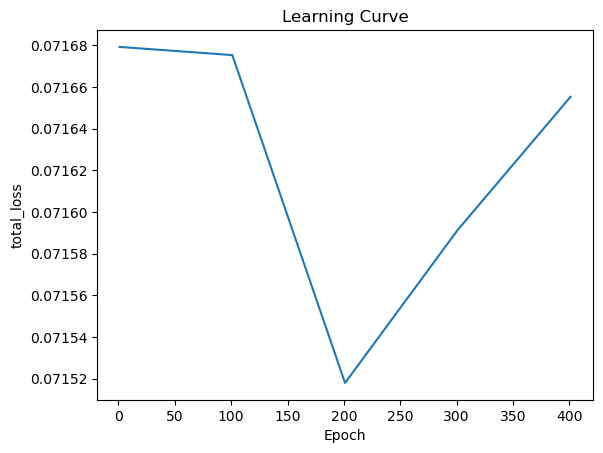

In [111]:
# Plotting the learning curve
plt.plot(range(1, epochs + 1, 100), total_loss_list2)
plt.ylabel("total_loss")
plt.xlabel('Epoch')
plt.title('Learning Curve')
plt.show()

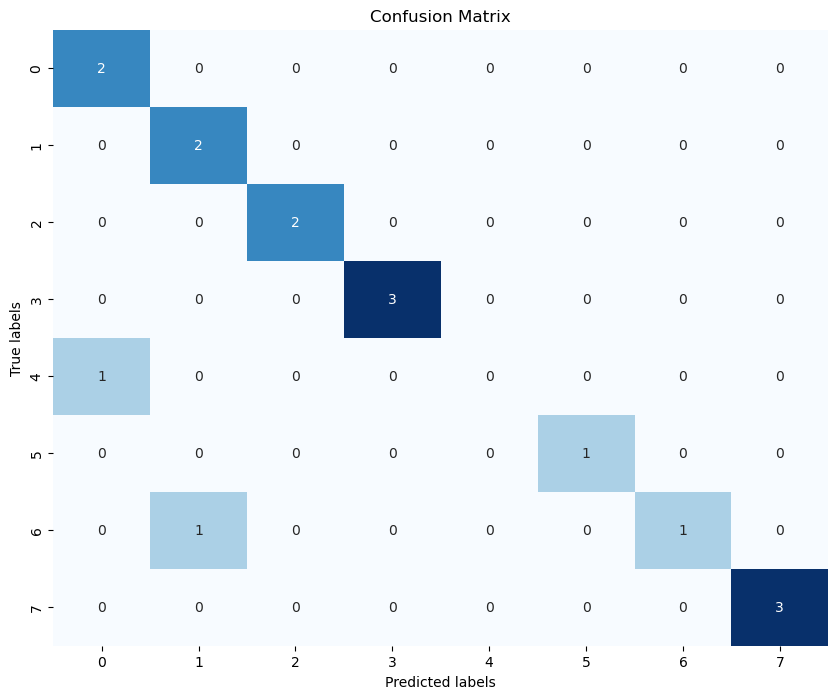

In [110]:
# Plotting the confusion matrix
# Calculate the confusion matrix
conf_matrix2 = confusion_matrix(target_labels2, predicted2)
# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

---
__Experiment 3__

In [61]:
# TODO (Students need to fill this section)
print(f'Experiment3 Training Accuracy: {train_accuracy3:.4f}')
print(f'Experiment3 Test Accuracy: {accuracy3:.4f}')

Experiment3 Training Accuracy: 0.9935
Experiment3 Test Accuracy: 0.9067


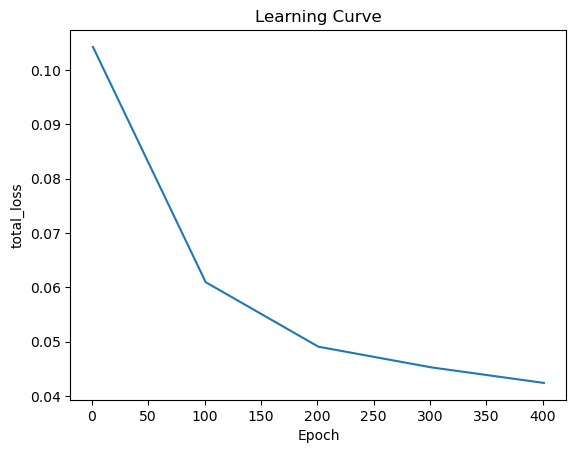

In [62]:
# Plotting the learning curve
plt.plot(range(1, epochs + 1, 100), total_loss_list3)
plt.ylabel("total_loss")
plt.xlabel('Epoch')
plt.title('Learning Curve')
plt.show()

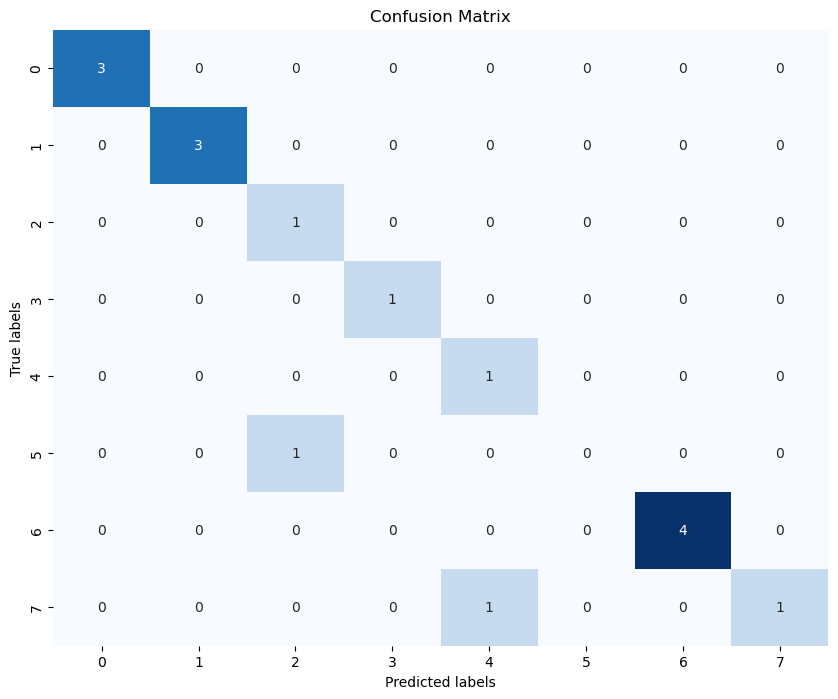

In [63]:
# Plotting the confusion matrix
# Calculate the confusion matrix
conf_matrix3 = confusion_matrix(target_labels3, predicted3)
# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

---
__Experiment 4__

In [67]:
# TODO (Students need to fill this section)
print(f'Experiment4 Training Accuracy: {train_accuracy4:.4f}')
print(f'Experiment4 Test Accuracy: {accuracy4:.4f}')

Experiment4 Training Accuracy: 0.9989
Experiment4 Test Accuracy: 0.9058


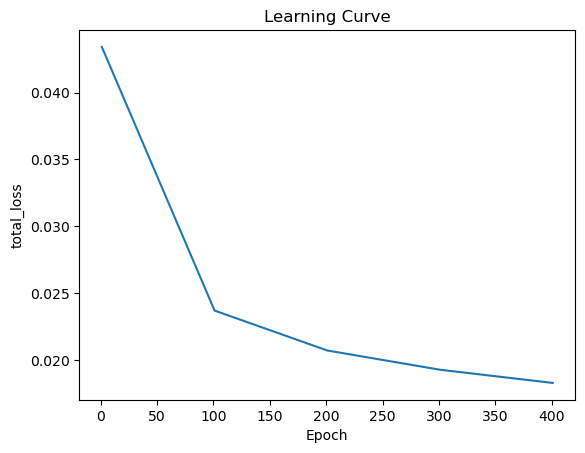

In [68]:
# Plotting the learning curve
plt.plot(range(1, epochs + 1, 100), total_loss_list4)
plt.ylabel("total_loss")
plt.xlabel('Epoch')
plt.title('Learning Curve')
plt.show()

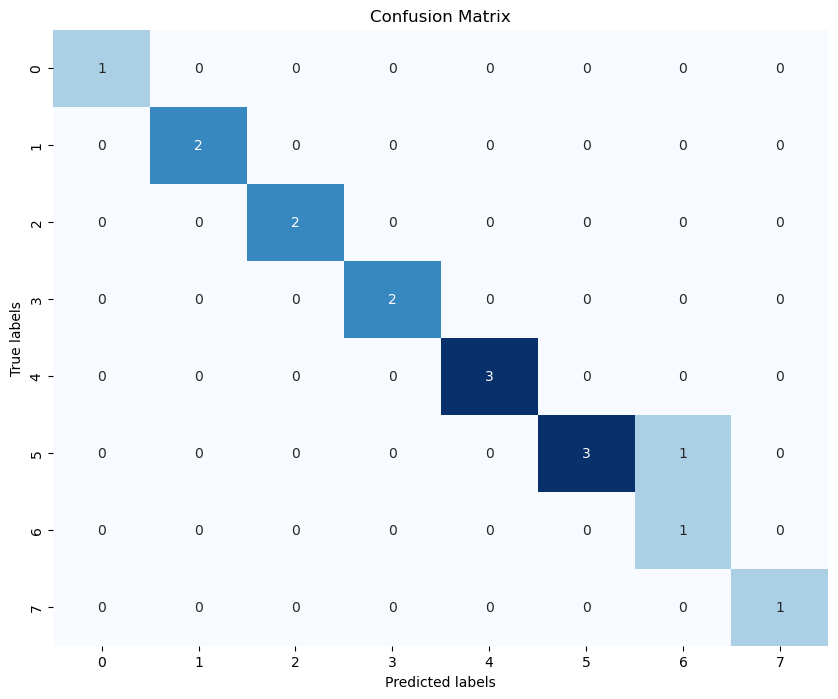

In [69]:
# Plotting the confusion matrix
# Calculate the confusion matrix
conf_matrix4 = confusion_matrix(target_labels4, predicted4)
# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

---
## Conclusion

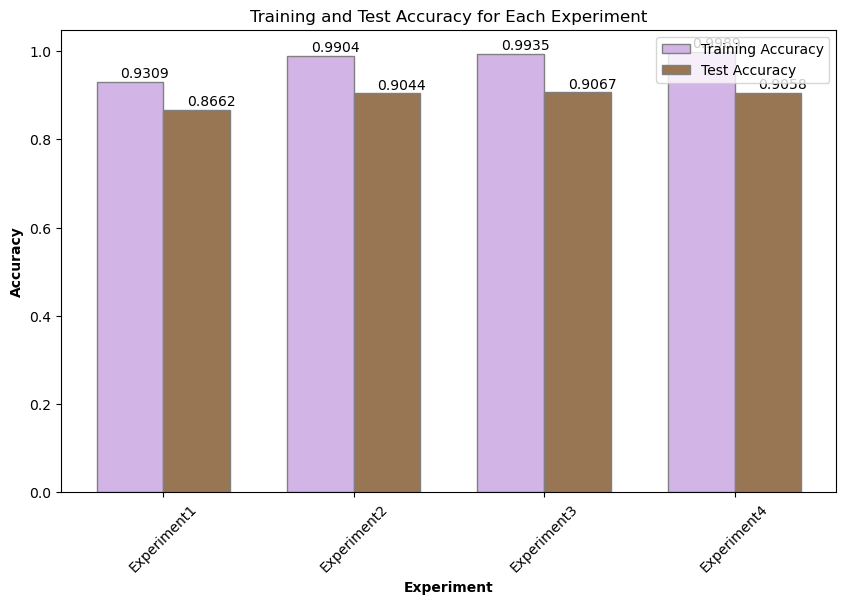

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Define the accuracy scores for each experiment
experiment_names = ['Experiment1', 'Experiment2', 'Experiment3', 'Experiment4']
train_accuracies = [train_accuracy1, train_accuracy2, train_accuracy3, train_accuracy4]
test_accuracies = [accuracy1, accuracy2, accuracy3, accuracy4]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(experiment_names))
r2 = [x + bar_width for x in r1]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, train_accuracies, color='#D3B4E7', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r2, test_accuracies, color='#987654', width=bar_width, edgecolor='grey', label='Test Accuracy')

# Add accuracy score labels to each bar
for i in range(len(experiment_names)):
    plt.text(r1[i] - 0.05, train_accuracies[i] + 0.01, f'{train_accuracies[i]:.4f}', color='black')
    plt.text(r2[i] - 0.05, test_accuracies[i] + 0.01, f'{test_accuracies[i]:.4f}', color='black')

# Add xticks on the middle of the group bars
plt.xlabel('Experiment', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(experiment_names))], experiment_names)
plt.title('Training and Test Accuracy for Each Experiment')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.show()
